# 인공신경망(NN)_분류

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
# 한글 폰트 적용
matplotlib.rc('font', family = 'Nanumgothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
import statsmodels.formula.api as smf
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.neural_network import MLPClassifier

# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# Confusin matrix
from sklearn.metrics import confusion_matrix

유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.
데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
 - 목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [2]:
df_raw  = pd.read_csv('./Data/유방암.csv', engine = 'python', encoding = 'cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
df_raw_x = df_raw.drop('diagnosis', axis = 1)
df_raw_y = df_raw['diagnosis']
df_raw_y = np.where(df_raw_y == '음성', 0, 1)

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [8]:
nn_uncostomized = MLPClassifier(random_state = 1234)
nn_uncostomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(nn_uncostomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(nn_uncostomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.599
Accuracy on test set:0.758


기본 모형에 대한 train, test데이터 정확도

train에 대한 정확도가 더 높은 것으로 봐서 과소적합되었다고 볼 수 있다,

**은닉층이 하나일 때**

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,  df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.906,0.914
1,40,0.911,0.922
2,60,0.599,0.758
3,80,0.594,0.758
4,100,0.599,0.758
5,120,0.849,0.875
6,140,0.938,0.891
7,160,0.922,0.930


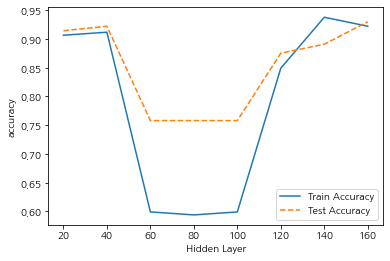

In [15]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

은닉층의 노드가 많아질 때 특정 구간에서 정확도가 감소하는 것을 볼 수 있다.  
이런 경향은 은닉층이 복잡해질수록 train data에 모델이 과대적합되기 때문이라 생각했다...

은닉층을 2개로 늘였을 때

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,  df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.901,0.875
1,40,0.599,0.758
2,60,0.943,0.875
3,80,0.599,0.758
4,100,0.875,0.859
5,120,0.865,0.828
6,140,0.833,0.734
7,160,0.880,0.914


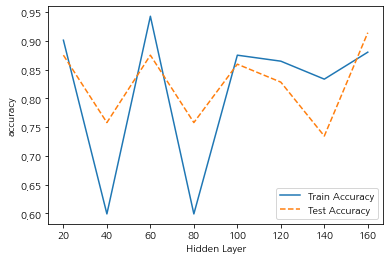

In [13]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

앞선 결과보다 은닉층 노드의 개수에 따라 모델이 더 unstable해진 것을 확인할 수 있다.
인공신경망 모델은 은닉층의 수, 은닉층 노드의 수에 따라 정확도가 많이 바뀌기 때문에 최적의 파라미터를 찾는 것이 중요하다,

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation  =v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,  df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_function.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


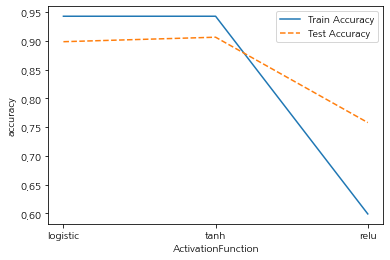

In [17]:
# 정확도를 그래프로 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("ActivationFunction")
plt.legend()

logistic과 tanh를 사용했을 때는 정확도가 비슷하지만 relu의 경우 변수 scaling 유무에 영향을 많이 받기 때문에 정확도의 차이가 많이 난다. 그 이유에 대해서 생각해봤을 때 relu의 경우 0이하의 입력값은 모두 0으로 처리하는데 이러한 특징이 학습의 속도를 높이는 장점도 있지만 지금처럼 정규화를 하지 않은 입력에 대해 정확도가 낮게 나오는데 영향을 끼치지 않을까라는 생각이 들었다.

# 정규화 진행 후

In [21]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [25]:
df_scaled_train_x, df_scaled_test_x, df_scaled_train_y, df_scaled_test_y = train_test_split(df_scaled, df_raw_y, test_size = 0.4,
                                                     random_state = 1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('train data X size: {}'.format(df_scaled_train_y.shape))
print('test data X size: {}'.format(df_scaled_test_x.shape))
print('test data X size: {}'.format(df_scaled_test_y.shape))

train data X size: (192, 30)
train data X size: (192,)
test data X size: (128, 30)
test data X size: (128,)


In [26]:
nn_uncostomized = MLPClassifier(random_state = 1234)
nn_uncostomized.fit(df_scaled_train_x, df_scaled_train_y)

print('Accuracy on training set:{:.3f}'.format(nn_uncostomized.score(df_scaled_train_x, df_scaled_train_y)))
print('Accuracy on test set:{:.3f}'.format(nn_uncostomized.score(df_scaled_test_x, df_scaled_test_y)))

Accuracy on training set:0.995
Accuracy on test set:0.953


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


정규화 전 정확도  
ccuracy on training set:0.599  
Accuracy on test set:0.758  

Scaling을 진행하고 난 후 기본모델에 대한 정확도가 상당히 증가하였다.

In [39]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,  df_scaled_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_scaled_test_y))
    

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.938
1,40,0.995,0.945
2,60,0.995,0.945
3,80,0.995,0.938
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953
7,160,0.995,0.953


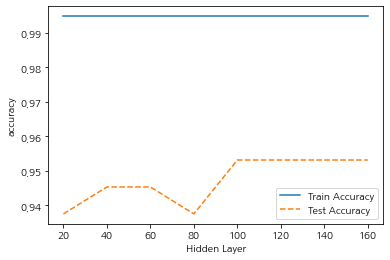

In [40]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

모델에 과적합된 모습을 확인할 수 있다. 은닉층 노드의 수가 증가할수록 test 정확도도 증가하는 경향을 보인다.

In [41]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation  =v_function, hidden_layer_sizes = 100 , random_state = 1234)
    nn.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,  df_scaled_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_scaled_test_y))
    

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_function.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.938
1,tanh,0.990,0.945
2,relu,0.995,0.953


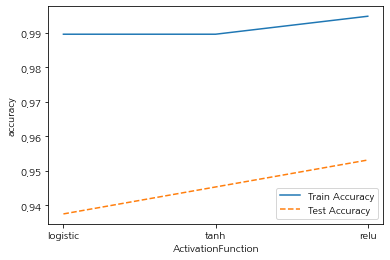

In [42]:
# 정확도를 그래프로 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("ActivationFunction")
plt.legend()

scaling을 했더니 앞선 결과와 달리 relu활성화함수를 썼을 때의 정확도가 가장 높게 나온다.

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, hidden_layer_sizes = 100, activation = 'relu', random_state = 1234)
    nn.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,  df_scaled_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_scaled_test_y))
    

# 데이터 테이블로 저장
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_solver.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.953
1,sgd,0.958,0.906
2,adam,0.995,0.953


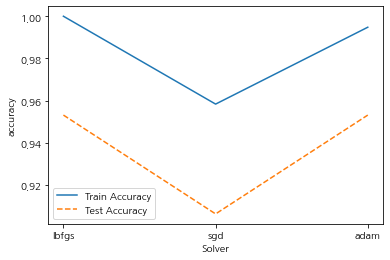

In [55]:
# 정확도를 그래프로 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

In [59]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size =v_batch, solver = 'adam', hidden_layer_sizes = 100, activation = 'relu', random_state = 1234)
    nn.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,  df_scaled_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_scaled_test_y))
    

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["ActivationFunction"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_batch.round(3)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages

,ActivationFunction,TrainAccuracy,TestAccuracy
0,20,1.000,0.945
1,40,1.000,0.953
2,60,1.000,0.945
3,80,1.000,0.953
4,100,1.000,0.953
5,120,1.000,0.953
6,140,1.000,0.953
7,160,0.995,0.953
8,180,0.995,0.953


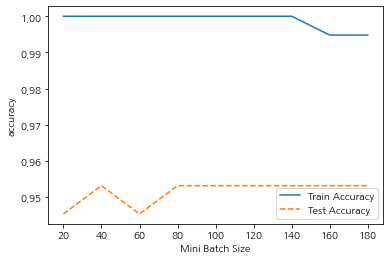

In [61]:
# 정확도를 그래프로 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [68]:
nn_final = MLPClassifier(batch_size =100, solver = 'adam', hidden_layer_sizes = 100, activation = 'relu', random_state = 1234)
nn_final.fit(df_scaled_train_x, df_scaled_train_y)

y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:1.000
Accuracy on test set:0.953
Confusion matrix: 
[[91  6]
 [ 0 31]]


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


> 결론  
인공신경망 최종 모델의 test 정확도는 95.3%로 높게 나왔는데 더 중요한 것은 양성을 양성으로 정확히 분류해냈다는 것이다!  지금껏 유방암 데이터에 대해 생성한 모델 중 양성을 완벽히 판별해낸 모델은 없었는데 인공신경망 모델의 파라미터를 잘 조절해줬더니 좋은 성능을 가진 모델이 생성됐다. 암진단의 경우 양성판별률이 모델을 평가할 때 가장 중요한 지표로 작용하므로 같은 데이터로 생성했던 이전 모델들보다 인공신경망 모델이 가장 성능이 좋다고 생각된다.